# BOSTON HOUSING MARKET ANALYSIS
This project focuses on analyzing the Boston Housing Market to identify key factors influencing the median value of owner-occupied homes (MEDV). 
The goal is to understand the relationships between socio-economic and environmental variables in the Boston Housing Market dataset and provide actionable insights for stakeholders.

## Dataset: Boston Housing Market 
The Boston Housing Market dataset contains various attributes of houses in different areas 
around Boston, Massachusetts, collected in the 1970s. The primary dependent variable for this 
project will be MEDV (Median value of owner-occupied homes in $1000s)

## Variables description 
#### CRIM: Crime rate per person in the town.
#### ZN: Percentage of land for large homes (lots over 25,000 sq ft).
#### INDUS: Percentage of land used for business (not stores).
#### CHAS: Whether the area is next to the Charles River (1 = yes, 0 = no).
#### NOX: Level of air pollution (nitric oxides, in parts per 10 million).
#### RM: Average number of rooms in each home.
#### AGE: Percentage of homes built before 1940.
#### DIS: Distance to main job centers in Boston.
#### RAD: How easy it is to reach major roads.
#### TAX: Property tax rate per $10,000 value.
#### PTRATIO: Number of students per teacher in the town’s schools.
#### LSTAT: Percentage of people with lower income or social status.
#### MEDV: Median value of homes in thousands of dollars (this is the value we want to predict).

In [5]:
#Installing the necessary libraries

%pip install seaborn 
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.7 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
##Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import statsmodels.api as sm

In [7]:
##Importing the dataset  and creating the dataframe
#Datapath = Path(r'C:\Users\Student\OneDrive - Year Up- BOS\Desktop\PYTHON\BostonProject\Boston.csv')
Datapath = 'abfss://BostonHousingValueProject@onelake.dfs.fabric.microsoft.com/BostonHousingLakehouse.Lakehouse/Files/Boston.csv'
df = pd.read_csv(Datapath)

In [8]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Inital Data Exploration

In [9]:
### Let's check the number of rows and columns
df.shape


(506, 13)

In [10]:
### Let's identify the data types 
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
### AGE columns type needs to be changed to int
df['AGE']=df['AGE'].astype(int)
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE          int64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
### Descriptive Statistics 
descriptive_statistics = df.describe().T # transpose for calculation
descriptive_statistics ['Skewness'] = df.skew()
descriptive_statistics ['Null values'] = df.isna().sum()
descriptive_statistics ['IQR'] =df.quantile(0.75)-df.quantile(0.25)


In [13]:

descriptive_statistics

,count,mean,std,min,25%,50%,75%,max,Skewness,Null values,IQR
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,5.223149,0,3.595038
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.225666,0,12.500000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.295022,0,12.910000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.405904,0,0.000000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.729308,0,0.175000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.403612,0,0.738000
AGE,506.0,68.156126,28.203316,2.00000,45.000000,77.00000,94.000000,100.0000,-0.596583,0,49.000000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.011781,0,3.088250
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.004815,0,20.000000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.669956,0,387.000000


In [14]:
#### 1- let's calculate the upperbound and lower bound
#descriptive_statistics ['IQR'] =df.quantile(0.75)-df.quantile(0.25)
def lower_bound(series):
    IQR = series.quantile(0.75)-series.quantile(0.25)
    return series.quantile(0.25)-1.5*IQR
    
def upper_bound(series):
    IQR = series.quantile(0.75)-series.quantile(0.25)
    return series.quantile(0.75)+1.5*IQR

In [15]:
descriptive_statistics['Lower Bound'] = df.agg(lower_bound)
descriptive_statistics['Upper Bound'] = df.agg(upper_bound)
descriptive_statistics.T


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.156126,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.203316,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.000000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.000000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.000000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.000000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000
Skewness,5.223149,2.225666,0.295022,3.405904,0.729308,0.403612,-0.596583,1.011781,1.004815,0.669956,-0.802325,0.906460,1.108098
Null values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### Based on the descriptive statistics, variables such as CRIM, ZN, and CHAS have the highest skewness
##### CHAS is a categorical variable; thus, the skewness is understandable
##### All the variables don't contain null values

In [16]:
### Let check for duplicates
df[df.duplicated() == True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


##### No duplicated rows has been return, that means our data doesn't contains duplicates

### Let's check for outliers 

In [17]:
# 1- let's calculate the upperbound and lower bound
# descriptive_statistics ['IQR'] =df.quantile(0.75)-df.quantile(0.25)
# We will be calling the function defined earlier about the lower bound and upper bound

def outliers_df(series):
    ''' Function to return outliers'''
    list_of_outliers = series[(series < lower_bound(series)) | ( series > upper_bound(series))]
    return list_of_outliers

In [18]:
df.agg([lower_bound,upper_bound])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
lower_bound,-5.310511,-18.75,-14.175,0.0,0.1865,4.7785,-28.5,-2.5322,-26.0,-301.5,13.2,-8.0575,5.0625
upper_bound,9.069639,31.25,37.465,0.0,0.8865,7.7305,167.5,9.8208,54.0,1246.5,24.4,31.9625,36.9625


In [19]:
outliers_df(df).count()

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
LSTAT       7
MEDV       40
dtype: int64

In [20]:
### Percentage of outliers
(outliers_df(df).count()/506)*100

CRIM       13.043478
ZN         13.438735
INDUS       0.000000
CHAS        6.916996
NOX         0.000000
RM          5.928854
AGE         0.000000
DIS         0.988142
RAD         0.000000
TAX         0.000000
PTRATIO     2.964427
LSTAT       1.383399
MEDV        7.905138
dtype: float64

##### it seems like CRIM, ZN, CHAS,RM,MEDV,PTRATIO , LSTAT have outliers 
##### let's plot them and see the distributions

<Axes: xlabel='MEDV', ylabel='Count'>

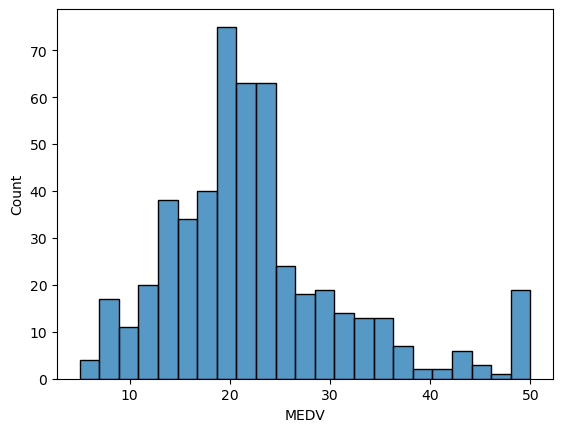

In [21]:
### Let's try plotting these variables with histogram and boxplot

sns.histplot(df, x = 'MEDV')

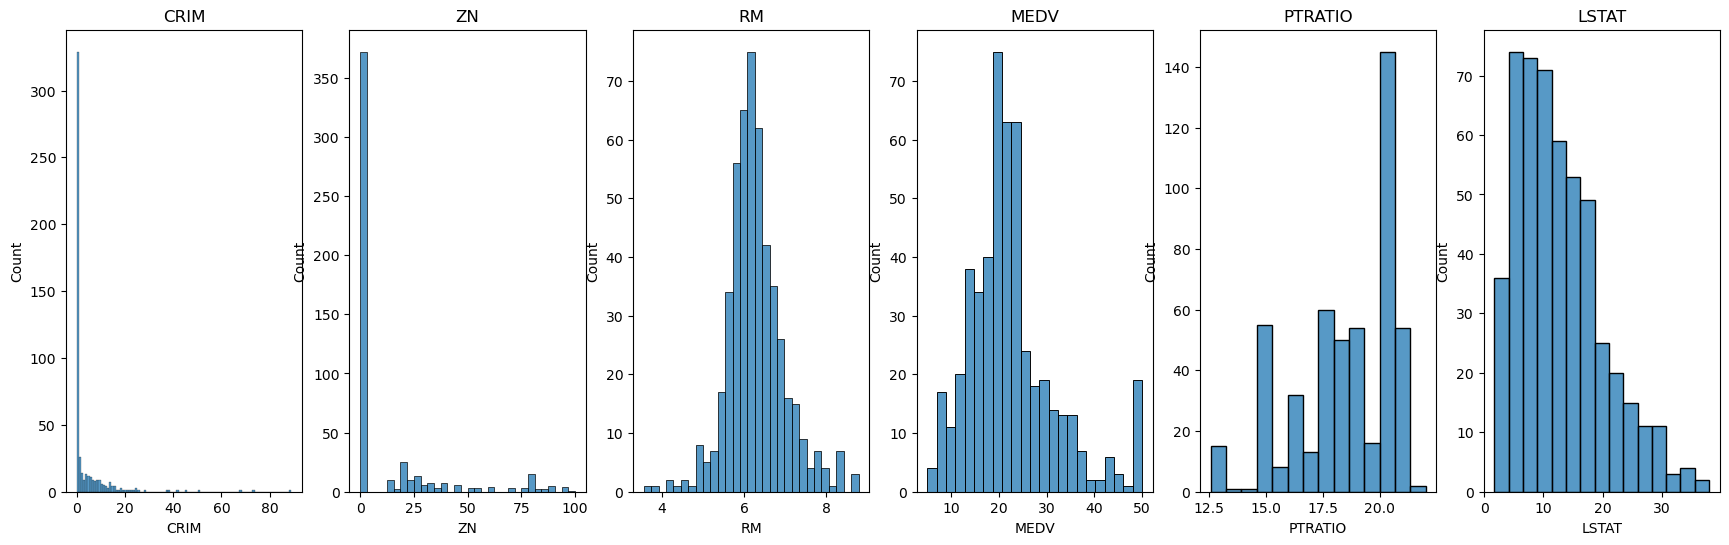

In [22]:
### let's plot these variables, but without CHAS since it's binary, categorical
cols = ['CRIM', 'ZN','RM','MEDV','PTRATIO','LSTAT']
plt.figure(figsize=(25,6))
for i,col in enumerate(cols):
    plt.subplot(1,7,i+1)
    sns.histplot(df[col])
    plt.title(col)
plt.show()

##### CRIM and ZN are highly right skewed
##### RM is sysmetric
##### LSTAT is also seems to be right skewed
##### MEDV is is slightly right skewed 

### Let's apply a log transformation in CRIM and ZN 


In [23]:
# Let's make a new dataframe containing the log-transformed variable (CRIM and ZN) 
# instead of the original variables of CRIM  and ZN
df2=df.copy()
df2["CRIM"] = np.log(df["CRIM"])
df2["ZN"] = np.log(df["ZN"]+1)
df2.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-5.064036,2.944439,2.31,0,0.538,6.575,65,4.0900,1,296,15.3,4.98,24.0
1,-3.600502,0.000000,7.07,0,0.469,6.421,78,4.9671,2,242,17.8,9.14,21.6
2,-3.601235,0.000000,7.07,0,0.469,7.185,61,4.9671,2,242,17.8,4.03,34.7
3,-3.430523,0.000000,2.18,0,0.458,6.998,45,6.0622,3,222,18.7,2.94,33.4
4,-2.672924,0.000000,2.18,0,0.458,7.147,54,6.0622,3,222,18.7,5.33,36.2


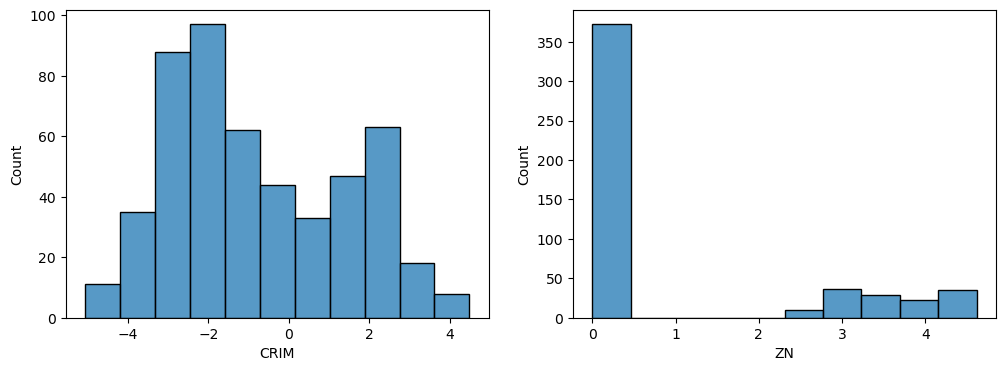

In [24]:
### let's plot them and see the distribution
plt.figure(figsize=(12,4))
for i,col in enumerate(["CRIM","ZN"]):
    plt.subplot(1,2,i+1)
    sns.histplot(df2[col])
plt.show()

##### CRIM variable has become bisymmetric now.
##### The variable ZN still shows the same the distribution and since the most of the values are zeros 

In [25]:
### changing the values of ZN to their intial values
df2["ZN"] = df["ZN"]

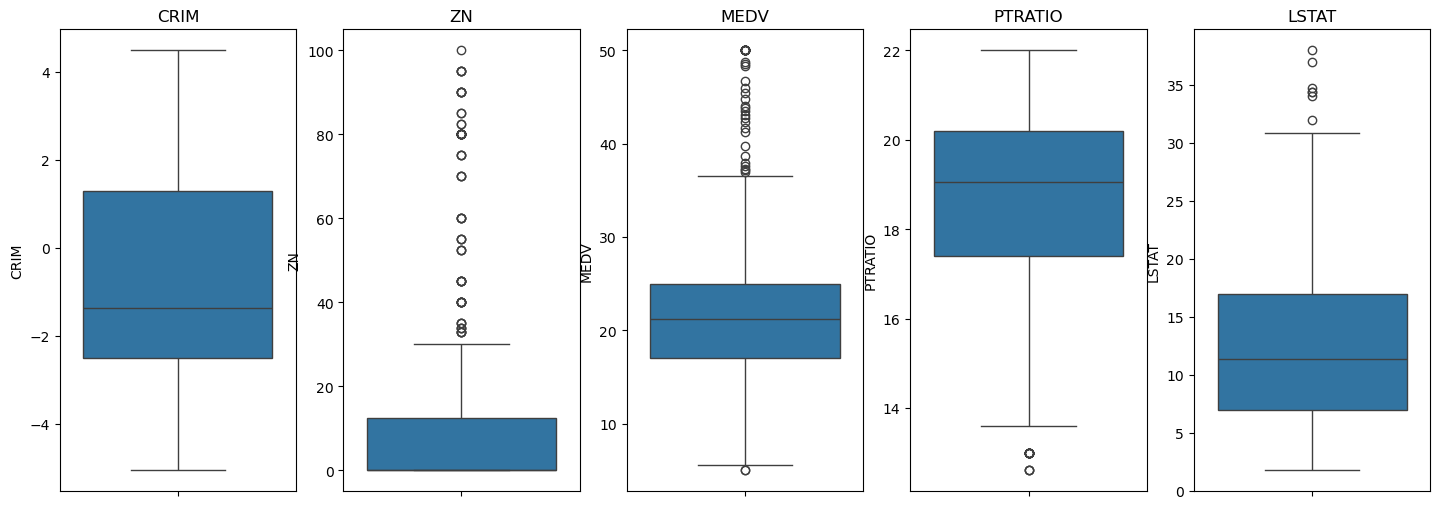

In [26]:
### Let's check by using the box plot
cols = ['CRIM', 'ZN','MEDV','PTRATIO','LSTAT']
plt.figure(figsize=(25,6))
for i,col in enumerate(cols):
    plt.subplot(1,7,i+1)
    sns.boxplot(df2[col])
    plt.title(col)
plt.show()

## Bivariate Analysis

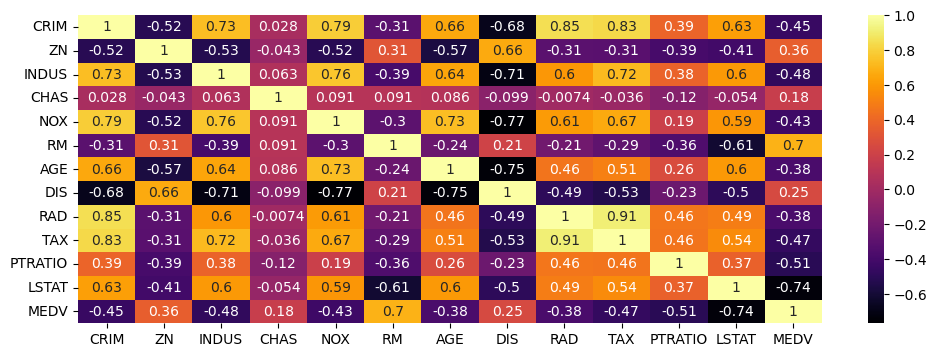

In [27]:
## let display the correlation matrix for all variables to see the output
plt.figure(figsize=(12,4))
sns.heatmap(df2.corr(),annot = True, cmap = "inferno")
plt.show()

##### MEDV seems to have a strong negative or positive correlation with LSTAT, RM 
#####  a moderate correlation  for PTRATIO, TAX, NOX, CRIM, INDUS
##### and have weak correlation with  ZN, AGE, RAD, CHAS, and DIS

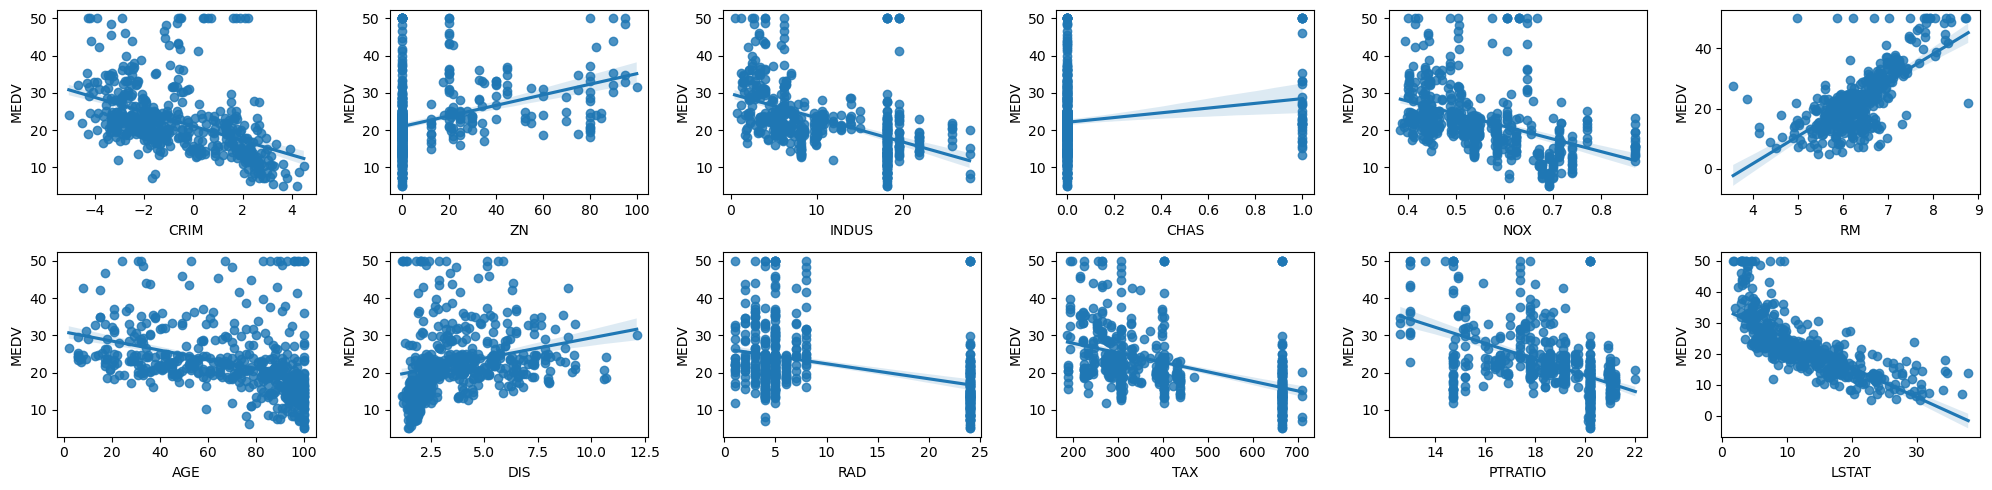

In [28]:
###Let's apply a regplot between MEDV and all the independent variables
###to verify their linear relationship
cols = df2.columns.drop("MEDV")
plt.figure(figsize=(20,5))
for i, col in enumerate(cols):
    plt.subplot(2,len(cols)//2,i+1)
    sns.regplot(x=df2[col],y=df2["MEDV"])  
plt.tight_layout()
plt.show()

#### MEDV seems to have a linear relationship with the independent variables

## Regression Analysis 


##### Let's apply simple linear regression between MEDV and CRIM, then the transformed CRIM 


🏃 View run helpful_dog_nx1yj5rd at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2/runs/bc58908f-88a7-4f45-a075-340227379c42
🧪 View experiment at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.17e-19
Time:                        19:30:58   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

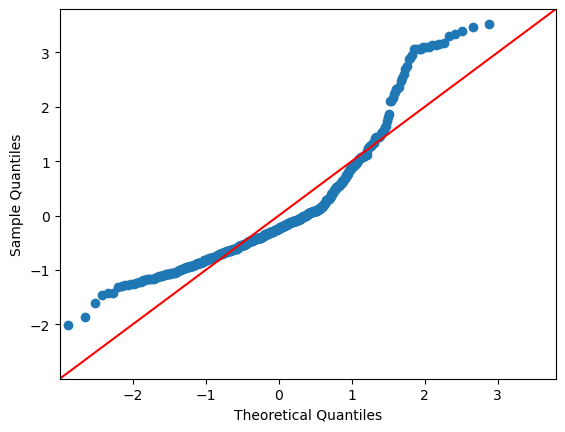

In [29]:
# MEDV vs intial CRIM 
x = df[["CRIM"]]
y = df["MEDV"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

# plot de residuals
residuals = model.resid
sm.qqplot(residuals,line='45', fit=True)
plt.show()

🏃 View run tender_moon_rm8w1xxp at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2/runs/428ae442-bf2a-4f54-83cc-456473ebb544
🧪 View experiment at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     131.1
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.90e-27
Time:                        19:31:05   Log-Likelihood:                -1781.8
No. Observations:                 506   AIC:                             3568.
Df Residuals:                     504   BIC:                             3576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0246      0.388     54.234      0.0

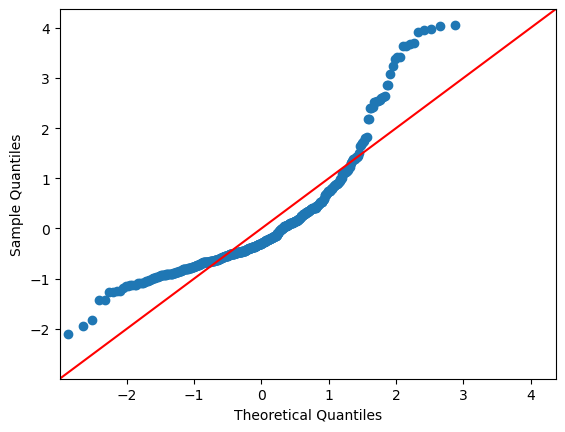

In [30]:
# MEDV vs transformed CRIM
x = df2[["CRIM"]]
y = df2["MEDV"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

#Get residuals
residuals = model.resid
sm.qqplot(residuals, line='45', fit=True)
plt.show()

##### Based on the value of R-squared, the transformed CRIM with MEDV has a value of 0.206, which is 
##### superior to the one for the initial CRIM  with MEDV. Thus we will keep the transformed CRIM for further analysis

##### Let's apply on this Multiple linear regression between MEDV and the variables with strong to moderate relationship with MEDV which are
##### CRIM, RM, PTRATIO, LSTAT, NOX, INDUS, TAX


In [31]:
x=df2[["CRIM", "RM", "PTRATIO", "LSTAT", "NOX", "INDUS", "TAX"]]
y=df2["MEDV"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

🏃 View run sharp_room_vd5b524p at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2/runs/046a653a-58d9-4638-9b36-a383901a595c
🧪 View experiment at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          2.82e-121
Time:                        19:31:12   Log-Likelihood:                -1546.3
No. Observations:                 506   AIC:                             3109.
Df Residuals:                     498   BIC:                             3142.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7865      4.936      5.427      0.0

##### The condition number seems to be higher, which means there is strong multicollinearity 
##### Tax and CRIM have a higher correlation, CRIM with TAX, INDUS, NOX
##### INDUS with TAX,NOX 

#### let do 2 multiple linear regression between MEDV vs:
#####  - PTRATIO, LSTAT, RM, CRIM
#####  -LSTAT, PTRATIO, RM, INDUS


In [32]:
cols=["PTRATIO","LSTAT","RM"]

In [33]:
#model1: MEDV vs LSTAT, PTRATIO, RM, INDUS
cols1=cols+["INDUS"]
x1=df2[cols1]
y=df2["MEDV"]
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

🏃 View run khaki_angle_2hs7l1y5 at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2/runs/8b3ff4ca-adc6-4d27-b987-20a7f298c498
🧪 View experiment at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     264.5
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          5.41e-122
Time:                        19:31:20   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     501   BIC:                             3137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6150      3.927      4.741      0.0

In [34]:
#MODEL 2: MEDV vs PTRATIO, LSTAT, RM, CRIM
cols2=cols + ["CRIM"]
x2=df2[cols2]
y=df2["MEDV"]
x2 = sm.add_constant(x2)
model2=sm.OLS(y,x2).fit()
print(model2.summary())

🏃 View run happy_bottle_j0lr8dtg at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2/runs/55195a16-6a82-4619-9ef7-8be7b6e85632
🧪 View experiment at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          4.00e-122
Time:                        19:31:25   Log-Likelihood:                -1552.7
No. Observations:                 506   AIC:                             3115.
Df Residuals:                     501   BIC:                             3137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7407      4.183      4.720      0.0

##### For a significance F = 0.001, the result in both models shows that CRIM and INDUS don't have a significance
##### influence in predicting the variable MEDV when combined with RM,  LSTAT, PTRATIO, as they have a p-value > 0.001.

In [35]:
#Let's plot MEDV vs RM, PTRATIO, LSTAT only
x=df2[["RM", "PTRATIO", "LSTAT"]]
y=df2["MEDV"]
#Creating the model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

🏃 View run careful_tangelo_gmxsj8q7 at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2/runs/929d7539-58c7-44f1-af15-366109cf6b28
🧪 View experiment at: https://pbipeastus3-eastus.pbidedicated.windows.net/webapi/capacities/7b4a485f-34f2-488a-b849-8afefae540e4/workloads/ML/ML/Automatic/workspaceid/192c5aa9-50ba-4192-ba74-3ea39ff9aeae/#/experiments/6273e84d-ea22-47b9-a367-8b5f92c950a2


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sun, 02 Nov 2025   Prob (F-statistic):          2.69e-123
Time:                        19:31:31   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

### Summary of Findings

#### Model Fit & Performance

The model explains 67.7% of the variation (adjusted R² = 0.677) in median home values (MEDV), which indicates a strong and reliable model fit for socioeconomic and housing data.

Prob (F-statistic): 2.69e-123 < 0.001 confirms that the model is statistically significant overall — meaning that the predictors collectively explain variation in housing prices.

#### Significant Predictors

##### RM (Average number of rooms per dwelling):

Coefficient = +4.52, p < 0.001

Interpretation: For each additional room, the median house value increases by about $4,515, holding other factors constant.

This is the strongest positive predictor of housing prices.

##### PTRATIO (Pupil–Teacher Ratio by town):

Coefficient = –0.93, p < 0.001

Interpretation: A higher pupil–teacher ratio (i.e., more students per teacher) is associated with a decrease in house prices. Education quality matters to property values.

##### LSTAT (% lower-status population):

Coefficient = –0.57, p < 0.001

Interpretation: Neighborhoods with a higher percentage of lower-status residents tend to have lower house prices. This reflects socioeconomic impacts on property value.


### Interpretation & Business Insight

**More spacious homes (more rooms)** are consistently valued higher — a key driver of housing price growth.

**Better school quality (lower pupil-teacher ratios)** contributes significantly to neighborhood desirability and higher home values.

**Socioeconomic composition (LSTAT)** remains a strong negative determinant — improving social infrastructure and employment may uplift property values.

## Recommendations 
Urban planners could focus on educational infrastructure and community development to improve property values.